<a href="https://colab.research.google.com/github/Archisha-Dhyani/Learning_ML/blob/main/CNN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization


Load Dataset

In [3]:

X_train = np.loadtxt('Downloads/CNN/input.csv', delimiter = ',')
Y_train = np.loadtxt('Downloads/CNN/labels.csv', delimiter = ',')

X_test = np.loadtxt('Downloads/CNN/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('Downloads/CNN/labels_test.csv', delimiter = ',')

In [4]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

# dividing from 255 so values range from 0 to 1 (normalization) . 255 is rgb limit
X_train = X_train/255.0
Y_train = Y_train/255.0
X_test = X_test/255.0
Y_test = Y_test/255.0

<function matplotlib.pyplot.show(close=None, block=None)>

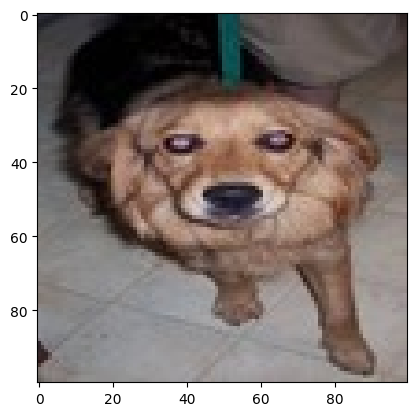

In [5]:
idx= random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show

Model


In [33]:
model = Sequential([
    Conv2D(32, (3,3), activation= 'relu', input_shape= (100,100,3)),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(64, (3,3), activation= 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),

    Conv2D(128, (3,3), activation= 'relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),


    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1,activation= 'sigmoid')

])

In [34]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])


In [36]:
model.fit(X_train,Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 [==============================] - 52s 2s/step - loss: 0.0355 - accuracy: 0.4990
Epoch 2/5
32/32 [==============================] - 57s 2s/step - loss: 0.0502 - accuracy: 0.4985
Epoch 3/5
32/32 [==============================] - 52s 2s/step - loss: 0.0589 - accuracy: 0.4990
Epoch 4/5
32/32 [==============================] - 61s 2s/step - loss: 0.0351 - accuracy: 0.4990
Epoch 5/5
32/32 [==============================] - 61s 2s/step - loss: 0.0423 - accuracy: 0.5000


In [38]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 4s 194ms/step - loss: 0.0338 - accuracy: 0.5000


[0.033822931349277496, 0.5]

Making Predictions


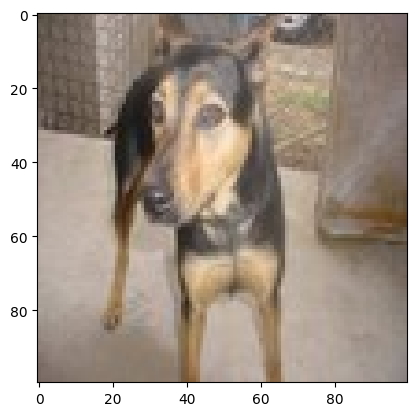

1/1 [==============================] - 0s 132ms/step
dog


In [39]:
idx2= random.randint(0,len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred= y_pred > 0.5

if(y_pred == 0):
  pred= 'dog'
else:
  pred = 'cat'
print(pred)